# PD Modelling, Scorecard, Credit Score and Cutoffs

In [1]:
#libs for managing data
import numpy as np
import pandas as pd

#libs for ML regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics  
from sklearn.metrics import roc_curve, roc_auc_score

#libs for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#exporting ML model
import pickle

# Importing Preprocessed Test and Train Dataset

In [2]:
loan_data_inputs_train = pd.read_csv ('C:/Users/prem kumarr r s/Downloads/loan_data_inputs_train.csv',index_col =0)
loan_data_targets_train = pd.read_csv ('C:/Users/prem kumarr r s/Downloads/loan_data_targets_train.csv',index_col =0)
loan_data_inputs_test = pd.read_csv ('C:/Users/prem kumarr r s/Downloads/loan_data_inputs_test.csv',index_col =0)
loan_data_targets_test = pd.read_csv ('C:/Users/prem kumarr r s/Downloads/loan_data_targets_test.csv',index_col =0)

# Exploring data

In [3]:
loan_data_inputs_train.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
221233,221233,1223440,1464089,16000,16000,16000.0,36 months,17.27,572.60,D,...,0,0,0,1,0,0,0,0,0,0
378461,378461,17654338,19786836,26350,26350,26350.0,60 months,16.99,654.73,D,...,1,0,0,1,0,0,0,0,0,0
117522,117522,6166624,7648747,4800,4800,4800.0,36 months,13.68,163.31,C,...,0,0,0,0,0,0,0,0,0,1
352107,352107,20689629,22962303,14000,14000,14000.0,60 months,15.61,337.56,D,...,0,0,0,1,0,0,0,0,0,0
253931,253931,34743135,37436415,15000,15000,15000.0,36 months,9.49,480.43,B,...,0,0,0,1,0,0,0,0,0,0


In [4]:
loan_data_targets_train.head()

,good_bad
221233,1
378461,1
117522,1
352107,1
253931,1


In [5]:
loan_data_inputs_train.shape

(373028, 324)

In [6]:
loan_data_targets_train.shape

(373028, 1)

In [7]:
loan_data_inputs_test.shape

(93257, 324)

In [8]:
loan_data_targets_test.shape

(93257, 1)

**Avoiding the Dummy Variable Trap**

For each categorical feature, dummy variables were created in the data table. For example, consider the home_ownership variable, which has three categories: RENT_OTHER_NONE_ANY, OWN, and MORTGAGE. Dummy variables were generated, resulting in three new columns: home_ownership:RENT_OTHER_NONE_ANY, home_ownership:OWN, and home_ownership:MORTGAGE. Each column consists of values 1 or 0, indicating the presence of each category.

For instance, if a borrower’s home_ownership is OWN, we have 1 in the home_ownership:OWN column and 0 in the others.

To avoid the dummy variable trap, we use home_ownership:RENT_OTHER_NONE_ANY as the reference category and exclude this column from the model. This way, we only keep two dummy columns (home_ownership:OWN and home_ownership:MORTGAGE) in our predictive model.

By removing one dummy column per original variable, we prevent multicollinearity issues that arise when redundant information is included, ensuring that each dummy variable provides unique information for the model.

In [9]:
# Here we select a limited set of input variables                                           
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',                
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]

In [10]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',                  
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [11]:
print("Columns in loan_data_inputs_train:")
print(loan_data_inputs_train.columns.tolist())

Columns in loan_data_inputs_train:
['Unnamed: 0.1', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', '

In [12]:
# Identify missing features
missing_features = [feature for feature in features_all if feature not in loan_data_inputs_train.columns]
print("Missing features in loan_data_inputs_train:")
print(missing_features)

Missing features in loan_data_inputs_train:
['mths_since_last_record:>=86']


In [13]:
# Now select only the columns from features_all that are present in loan_data_inputs_train
valid_features = [feature for feature in features_all if feature in loan_data_inputs_train.columns]
inputs_train = loan_data_inputs_train.loc[:, valid_features]

In [14]:
# Drop the columns specified in ref_categories
inputs_train = inputs_train.drop(ref_categories, axis=1)

# Display the first few rows of the resulting DataFrame
print(inputs_train.head())

        grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
221233        0        0        0        1        0        0   
378461        0        0        0        1        0        0   
117522        0        0        1        0        0        0   
352107        0        0        0        1        0        0   
253931        0        1        0        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
221233                   0                        0                 0   
378461                   0                        1                 0   
117522                   0                        0                 0   
352107                   0                        1                 0   
253931                   0                        0                 0   

        addr_state:NY  ...  dti:22.4-35  mths_since_last_delinq:Missing  \
221233              0  ...            0                               0   
378461              0  ...

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [16]:
reg = LogisticRegression()
# Create an instance of an object from the 'LogisticRegression' class

In [17]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
#  with inputs (independent variables) contained in the first dataframe
#  and targets (dependent variables) contained in the second dataframe.

C:\Users\prem kumarr r s\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prem kumarr r s\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
reg.intercept_
# Displays the intercept contain in the estimated ("fitted") object 
#  from the 'LogisticRegression' class

array([0.71699863])

In [19]:
reg.coef_
# Displays the coefficients contained in the estimated ("fitted") object 
#  from the 'LogisticRegression' class

array([[ 0.8703021 ,  0.75485855,  0.55661235,  0.40614223,  0.28406777,
         0.13712665,  0.08392544,  0.10868468,  0.0500312 ,  0.03939797,
         0.06265068,  0.05511317,  0.06287587,  0.12035957,  0.11605989,
         0.19357997,  0.25074723,  0.23313517,  0.26759572,  0.31203929,
         0.46491685,  0.09860661, -0.00531433,  0.31635326,  0.20282474,
         0.23051416,  0.27032007,  0.05269065,  0.07425439,  0.09915357,
         0.10974121,  0.07818933,  0.05749031,  0.12001539,  0.80871794,
         0.59582505,  0.47346829,  0.29052384,  0.14352188, -0.09892   ,
        -0.35282361,  1.10466084,  0.67042259,  0.41769492,  0.1825255 ,
         0.03833171,  0.02086775,  0.05431128,  0.08504874,  0.11129274,
         0.02820125, -0.02451458, -0.90022176, -1.04944094, -1.16789628,
         0.18215264,  0.09989749,  0.08930012,  0.08096162,  0.08309296,
         0.08881672, -0.00372103, -0.02572664, -0.07935429, -0.03753329,
        -0.03577603, -0.00562401,  0.0292942 ,  0.0

In [20]:
feature_name = inputs_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [21]:
summary_table = pd.DataFrame(columns=['Feature Name'], data = feature_name)
# Create a dataframe with a column titled 'Feature name' and 
#  row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
#  with row values the transposed coefficients 
#  from the 'LogisticRegression' object
summary_table.index = summary_table.index + 1
# Increase the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sort the dataframe by index.
summary_table

,Feature Name,Coefficients
0,Intercept,0.716999
1,grade:A,0.870302
2,grade:B,0.754859
3,grade:C,0.556612
4,grade:D,0.406142
...,...,...
99,mths_since_last_record:Missing,0.053265
100,mths_since_last_record:3-20,0.107935
101,mths_since_last_record:21-31,0.140047
102,mths_since_last_record:32-80,0.256894


**Prediction of Default (PD) Model Fit Using P-Values**

For the PD model, we choose logistic regression in alignment with the Basel Accord requirements.

Building a Logistic Regression Model with P-Values

What is a P-Value and Its Role in Validating Relationships

A p-value is a statistical measurement used to evaluate whether the observed relationship between variables is likely due to chance or represents a true correlation. Specifically, "the p-value is, assuming that the null hypothesis is correct, the probability of obtaining results at least as extreme as the observed results in a statistical hypothesis test."

The null hypothesis assumes there is no relationship between the variables being studied (i.e., one variable does not affect the other). Therefore, a low p-value indicates that the observed relationship is unlikely to be due to chance, suggesting a statistically significant association between variables.

Interpreting P-Values in Model Evaluation

A smaller p-value (e.g., 0.05 or lower) indicates stronger evidence against the null hypothesis and supports the alternative hypothesis, suggesting that the observed effect is statistically significant.

A p-value of 0.05 or less is typically considered statistically significant, meaning there's less than a 5% probability that the observed relationship is due to random chance.

Why P-Values Matter in PD Model Building

When building the PD model, p-values help verify whether each predictor variable (feature) has a statistically meaningful relationship with the target outcome. A high p-value suggests that the predictor may not significantly influence the outcome and could be excluded to simplify the model.

Strategy for Feature Evaluation Using P-Values

Review p-values for all categories of each feature. If most dummy variables of a feature show a p-value above 0.05, consider eliminating them, as they may lack statistical significance.

By filtering out non-significant features (p > 0.05), we can enhance the model's interpretability and focus on predictors that truly impact default probability.

In summary, p-values serve as a vital tool for refining the PD model, ensuring only statistically relevant predictors are included. This enhances model performance and provides greater confidence in the predictions.

In [22]:
# As there is no built-in method to calcualte P values for 
#  sklearn logistic regression

# Build a Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [23]:
# Replicate the codes in early section
reg = LogisticRegression_with_p_values()
reg.fit(inputs_train, loan_data_targets_train)
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

C:\Users\prem kumarr r s\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prem kumarr r s\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Feature name,Coefficients
0,Intercept,0.716999
1,grade:A,0.870302
2,grade:B,0.754859
3,grade:C,0.556612
4,grade:D,0.406142
...,...,...
99,mths_since_last_record:Missing,0.053265
100,mths_since_last_record:3-20,0.107935
101,mths_since_last_record:21-31,0.140047
102,mths_since_last_record:32-80,0.256894


In [24]:
# Store p-values for easier access
p_values = reg.p_values

In [25]:
# Add the value 'NaN' in the beginning of the variable with p-values
# Convert it to a array
p_values = [np.nan] + reg.p_values


In [26]:
summary_table['P Values'] = p_values
pd.options.display.max_rows = None
summary_table

,Feature name,Coefficients,P Values
0,Intercept,0.716999,NaN
1,grade:A,0.870302,2.278014e-20
2,grade:B,0.754859,4.952840e-34
3,grade:C,0.556612,4.916922e-22
4,grade:D,0.406142,1.386170e-13
5,grade:E,0.284068,6.692547e-09
6,grade:F,0.137127,7.335351e-03
7,home_ownership:OWN,0.083925,3.351710e-05
8,home_ownership:MORTGAGE,0.108685,1.947893e-17
9,addr_state:NM_VA,0.050031,1.226652e-01


In [27]:
# Filter for significant variables with p-value < 0.05
significant_vars = summary_table[summary_table['P Values'] < 0.05]

# Display significant variables
print(significant_vars)

                            Feature name  Coefficients      P Values
1                                grade:A      0.870302  2.278014e-20
2                                grade:B      0.754859  4.952840e-34
3                                grade:C      0.556612  4.916922e-22
4                                grade:D      0.406142  1.386170e-13
5                                grade:E      0.284068  6.692547e-09
6                                grade:F      0.137127  7.335351e-03
7                     home_ownership:OWN      0.083925  3.351710e-05
8                home_ownership:MORTGAGE      0.108685  1.947893e-17
11          addr_state:OK_TN_MO_LA_MD_NC      0.062651  7.384676e-03
12                         addr_state:CA      0.055113  1.002824e-02
13                addr_state:UT_KY_AZ_NJ      0.062876  1.223195e-02
14             addr_state:AR_MI_PA_OH_MN      0.120360  1.093526e-07
15             addr_state:RI_MA_DE_SD_IN      0.116060  1.287311e-04
16                   addr_state:GA

In [28]:
# Filter for non-significant variables with p-value > 0.05
non_significant_vars = summary_table[summary_table['P Values'] > 0.05]

# Display non-significant variables
print(non_significant_vars)

                            Feature name  Coefficients  P Values
9                       addr_state:NM_VA      0.050031  0.122665
10                         addr_state:NY      0.039398  0.106418
23   verification_status:Source Verified     -0.005314  0.694175
46   mths_since_earliest_cr_line:141-164      0.038332  0.128234
47   mths_since_earliest_cr_line:165-247      0.020868  0.308958
51                         delinq_2yrs:0      0.028201  0.626731
52                       delinq_2yrs:1-3     -0.024515  0.653446
56                          open_acc:1-3      0.182153  0.420582
57                         open_acc:4-12      0.099897  0.654381
58                        open_acc:13-17      0.089300  0.689341
59                        open_acc:18-22      0.080962  0.717903
60                        open_acc:23-25      0.083093  0.715027
61                        open_acc:26-30      0.088817  0.701098
62                         open_acc:>=31     -0.003721  0.987723
63                       

# Build Logistic Regression Models without Insignificant Variables

In [29]:
# We commented on some features, the coefficients for all or almost all of the dummy variables for which,
# are not statistically significant.
# Refined variables

features_exclud_insig_var = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
#'addr_state:NM_VA',
#'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
#'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',                
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
#'mths_since_earliest_cr_line:141-164',
#'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
#'delinq_2yrs:0',
#'delinq_2yrs:1-3',
#'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
#'open_acc:1-3',
#'open_acc:4-12',
#'open_acc:13-17',
#'open_acc:18-22',
#'open_acc:23-25',
#'open_acc:26-30',
#'open_acc:>=31',
#'pub_rec:0-2',
#'pub_rec:3-4',
#'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
#'total_acc:>=52',
#'acc_now_delinq:0',
#'acc_now_delinq:>=1',
#'total_rev_hi_lim:<=5K',
#'total_rev_hi_lim:5K-10K',
#'total_rev_hi_lim:10K-20K',
#'total_rev_hi_lim:20K-30K',
#'total_rev_hi_lim:30K-40K',
#'total_rev_hi_lim:40K-55K',
#'total_rev_hi_lim:55K-95K',
#'total_rev_hi_lim:>95K',
#'annual_inc:<20K',
#'annual_inc:20K-30K',
#'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
#'mths_since_last_delinq:Missing',
#'mths_since_last_delinq:0-3',
#'mths_since_last_delinq:4-30',
#'mths_since_last_delinq:31-56',
#'mths_since_last_delinq:>=57',
#'mths_since_last_record:Missing',
#'mths_since_last_record:0-2',
#'mths_since_last_record:3-20',
#'mths_since_last_record:21-31',
#'mths_since_last_record:32-80',
#'mths_since_last_record:81-86',
#'mths_since_last_record:>=86',
]

In [30]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',                  
'int_rate:>20.281',
#'mths_since_earliest_cr_line:<140',
#'delinq_2yrs:>=4',
'inq_last_6mths:>6',
#'open_acc:0',
#'pub_rec:0-2',
'total_acc:<=27',
#'acc_now_delinq:0',
#'total_rev_hi_lim:<=5K',
#'annual_inc:<20K',
'dti:>35',
#'mths_since_last_delinq:0-3',
#'mths_since_last_record:0-2'
]

In [31]:
missing_features = [feature for feature in features_exclud_insig_var if feature not in loan_data_inputs_train.columns]

In [32]:
valid_features = [feature for feature in features_exclud_insig_var if feature in loan_data_inputs_train.columns]
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:, valid_features]

In [33]:
# Drop the columns specified in ref_categories
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis=1)

# Display the first few rows of the resulting DataFrame
print(inputs_train.head())

        grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
221233        0        0        0        1        0        0   
378461        0        0        0        1        0        0   
117522        0        0        1        0        0        0   
352107        0        0        0        1        0        0   
253931        0        1        0        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  \
221233                   0                        0   
378461                   0                        1   
117522                   0                        0   
352107                   0                        1   
253931                   0                        0   

        addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  ...  annual_inc:>140K  \
221233                             0              1  ...                 0   
378461                             0              0  ...                 0   
117522                             0              

In [34]:
inputs_train.shape

(373028, 69)

In [35]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

C:\Users\prem kumarr r s\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prem kumarr r s\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,1.183041
1,grade:A,0.753972
2,grade:B,0.701976
3,grade:C,0.511710
4,grade:D,0.365459
5,grade:E,0.250431
6,grade:F,0.108543
7,home_ownership:OWN,0.083602
8,home_ownership:MORTGAGE,0.107817
9,addr_state:OK_TN_MO_LA_MD_NC,0.038153


In [37]:
# Add P values
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['P Values'] = p_values
summary_table

,Feature name,Coefficients,P Values
0,Intercept,1.183041,NaN
1,grade:A,0.753972,1.842806e-15
2,grade:B,0.701976,1.054752e-29
3,grade:C,0.511710,7.146954e-19
4,grade:D,0.365459,2.777032e-11
5,grade:E,0.250431,2.992781e-07
6,grade:F,0.108543,3.326276e-02
7,home_ownership:OWN,0.083602,3.402758e-05
8,home_ownership:MORTGAGE,0.107817,1.356195e-17
9,addr_state:OK_TN_MO_LA_MD_NC,0.038153,5.875137e-02


In [38]:
# Filter for significant variables with p-value < 0.05
significant_vars1 = summary_table[summary_table['P Values'] < 0.05]

# Display significant variables
print(significant_vars1)

                           Feature name  Coefficients       P Values
1                               grade:A      0.753972   1.842806e-15
2                               grade:B      0.701976   1.054752e-29
3                               grade:C      0.511710   7.146954e-19
4                               grade:D      0.365459   2.777032e-11
5                               grade:E      0.250431   2.992781e-07
6                               grade:F      0.108543   3.326276e-02
7                    home_ownership:OWN      0.083602   3.402758e-05
8               home_ownership:MORTGAGE      0.107817   1.356195e-17
12            addr_state:AR_MI_PA_OH_MN      0.095955   7.161099e-07
13            addr_state:RI_MA_DE_SD_IN      0.092127   9.339871e-04
14                  addr_state:GA_WA_OR      0.171105   1.486545e-12
15                     addr_state:WI_MT      0.244676   2.228500e-07
16                        addr_state:TX      0.205885   1.394982e-18
17                     addr_state:

# Dumping trained PD model

In [39]:
import pickle

In [40]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

In [41]:
print("Columns in loan_data_inputs_train:")
print(loan_data_inputs_test.columns.tolist())

Columns in loan_data_inputs_train:
['Unnamed: 0.1', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', '

# PD Model Validation
# Remove insignificant variables from test dataframe

In [42]:
# Identify missing features
missing_features = [feature for feature in features_exclud_insig_var if feature not in loan_data_inputs_test.columns]
print("Missing features in loan_data_inputs_test:")
print(missing_features)

Missing features in loan_data_inputs_test:
[]


In [43]:
# Now select only the columns from features_all that are present in loan_data_inputs_train
valid_features = [feature for feature in features_exclud_insig_var if feature in loan_data_inputs_test.columns]
inputs_test_with_ref_cat = loan_data_inputs_test.loc[:, valid_features]


In [44]:
# Drop the columns specified in ref_categories
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis=1)

# Display the first few rows of the resulting DataFrame
print(inputs_test.head())

        grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
115315        0        1        0        0        0        0   
420540        0        1        0        0        0        0   
76957         0        1        0        0        0        0   
114743        0        0        1        0        0        0   
365207        1        0        0        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  \
115315                   0                        1   
420540                   0                        0   
76957                    0                        1   
114743                   0                        1   
365207                   0                        1   

        addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  ...  annual_inc:>140K  \
115315                             0              0  ...                 1   
420540                             1              0  ...                 0   
76957                              0              

# Estimate the probability of default for each observation

In [45]:
y_hat_test = reg2.model.predict(inputs_test)
# Calculates the predicted values for the dependent variable (targets)
#  based on the values of the independent variables (inputs) supplied as an argument.
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [46]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
y_hat_test_proba

array([[0.06052503, 0.93947497],
       [0.04261659, 0.95738341],
       [0.06402982, 0.93597018],
       ...,
       [0.11727339, 0.88272661],
       [0.12352596, 0.87647404],
       [0.1853089 , 0.8146911 ]])

In [47]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
# Only leave the 'good' probabilities in the array
y_hat_test_proba

array([0.93947497, 0.95738341, 0.93597018, ..., 0.88272661, 0.87647404,
       0.8146911 ])

In [48]:
loan_data_targets_test_temp = loan_data_targets_test.copy()
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
# Reset the index of a dataframe, as we need to concat the dfs

In [49]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
# Rename the columns
df_actual_predicted_probs.index = loan_data_targets_test.index
# Revert the index
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
115315,1,0.939475
420540,1,0.957383
76957,1,0.935970
114743,1,0.845200
365207,1,0.977889


# Evaluation of Model Performances
# Calculation of Accuracy

Accuracy is the fraction of predictions our model predicted correctly.

It should be noted that accuracy alone is insufficient when working with class-imbalanced datasets, where a significant difference exists between the number of positive and negative labels.

A class-imbalanced dataset is a dataset where the number of samples in one class significantly outweighs the number of samples in other classes.

In this case, we define the threshold as 0.9 to determine whether to accept a loan request.

# Confusion Matrix




In [50]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1,0)
# Reset to show a limited number of rows (default is usually 10)
pd.set_option('display.max_rows', 10)
df_actual_predicted_probs

,loan_data_targets_test,y_hat_test_proba,y_hat_test
115315,1,0.939475,1
420540,1,0.957383,1
76957,1,0.935970,1
114743,1,0.845200,0
365207,1,0.977889,1
...,...,...,...
312682,1,0.960767,1
165513,1,0.930199,1
242391,1,0.882727,0
166140,0,0.876474,0


In [51]:
confusion_matrix = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
                               df_actual_predicted_probs['y_hat_test'],
                               rownames = ['Actual'], colnames = ['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,7177,2968
1,35409,47703


Confusion Matrix: A Visual Representation of Model Performance

A confusion matrix is a table that summarizes the performance of a classification model on a set of test data. It provides a detailed breakdown of correct and incorrect predictions, categorized into four key metrics:   

1. True Positive (TP): Correctly predicted positive cases.
2. True Negative (TN): Correctly predicted negative cases.
3. False Positive (FP): Incorrectly predicted positive cases (Type I error).
4. False Negative (FN): Incorrectly predicted negative cases (Type II error).   

Typical Confusion Matrix:

Predicted	--Positive	--Negative

Actual		

Positive	--------TP	---FN

Negative	------FP	---TN

Interpreting a Confusion Matrix:

Accuracy: Overall, how often is the model correct?
Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision: How often is the model correct when it predicts positive?
Precision = TP / (TP + FP)

Recall (Sensitivity): How often does the model correctly identify positive cases?
Recall = TP / (TP + FN)   

Specificity: How often does the model correctly identify negative cases?
Specificity = TN / (TN + FP)   

F1-Score: Harmonic mean of precision and recall. A good measure of overall performance.   


In [52]:
confusion_matrix_per = confusion_matrix / df_actual_predicted_probs.shape[0]
confusion_matrix_per

Predicted,0,1
Actual,,
0,0.076959,0.031826
1,0.379693,0.511522


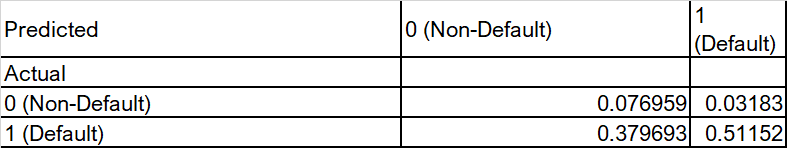

Interpretation:

* True Negative (TN): 0.076959: The model correctly predicted 7.69% of the non-defaulting loans as non-defaulting.
* False Positive (FP): 0.031826: The model incorrectly predicted 3.18% of the non-defaulting loans as defaulting.
* False Negative (FN): 0.379693: The model incorrectly predicted 37.97% of the defaulting loans as non-defaulting.
* True Positive (TP): 0.511522: The model correctly predicted 51.15% of the defaulting loans as defaulting.

Analysis:

* High False Negative Rate: The model struggles to accurately identify defaulting loans, leading to potential financial risks.
* Reasonable True Positive Rate: The model has a decent ability to correctly identify defaulting loans.
* Moderate False Positive Rate: The model incorrectly flags some non-defaulting loans as risky, potentially leading to lost business opportunities.!

In [53]:
true_neg = confusion_matrix_per.iloc[0,0]
true_pos = confusion_matrix_per.iloc[1,1]
true_rate = true_neg + true_pos
true_rate

0.5884812936294327

In [54]:
#checking accuracy
print(metrics.accuracy_score(df_actual_predicted_probs.loan_data_targets_test, df_actual_predicted_probs.y_hat_test))

0.5884812936294327


Accuracy on test dataset= 0.5884
58% of the time, the model predicted correctly whether or not the borrower will default for a set threshold of 0.9.

It means that the model makes bad estimations 42% of the time. 2% of the time, it fails predicting default (bad) cases. 40% of the time it fails predicting good cases where the borrower did not default.

High False Negative Rate (40%): The model incorrectly predicted that 40% of good borrowers would default, potentially leading to lost business opportunities.
Low False Positive Rate (2%): The model correctly identified most bad borrowers, reducing the risk of loan defaults.

In point of view of the bank, the results are overconservative and reduce the risk of money lost due to the borrower being defaulted.

This may bring the problem of a bank losing customers as the model fails giving credits to some GOOD borrowers.

Is it good enough?

=> For this example case, we do not go further to tweak the scores. The optimal is to reduce the false negatives (priority) and false positives. Let's go further to investigate the model performance.

b Area Under ROC
Receiver Operating Characteristic= ROC

Area under curve (AUC) plots the True Positive Rates against False Positive Rates at various threshold values. It can separate the ‘signal’ from the ‘noise’. It is used to measure the ability of a classifier to differentiate between classes.

AUC ranges in value from 0 to 1. The higher the AUC, the better the performance of the model at distinguishing between the P and N classes.

# ROC Curve and AUC

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

In [56]:
log_roc = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], 
                    df_actual_predicted_probs['y_hat_test_proba'])
log_roc
# Returns the Receiver Operating Characteristic (ROC) Curve from 
#  a set of actual values and their predicted probabilities
# As a result, we get three arrays: the false positive rates, 
#  the true positive rates, and the thresholds

(array([0.        , 0.        , 0.        , ..., 0.99970429, 0.99970429,
        1.        ]),
 array([0.00000000e+00, 1.20319569e-05, 3.12830879e-04, ...,
        9.99987968e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99148762, 0.99148762, 0.99001046, ..., 0.52657425, 0.51450367,
        0.49054311]))

In [57]:
fpr,tpr,thresholds = log_roc
# Store each of the three arrays in a separate variable

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

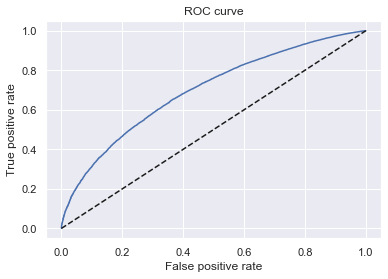

In [59]:
plt.plot(fpr,tpr)
plt.plot(tpr,tpr, linestyle = '--', color ='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

**What is a ROC Curve?**

A Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.   

plot Helps visualize the trade-off between sensitivity and specificity.

* True Positive Rate (TPR): The proportion of actual positive cases that are correctly identified as positive.   
* False Positive Rate (FPR): The proportion of actual negative cases that are incorrectly identified as positive.


**Understanding the AUC**

The Area Under the Curve (AUC) is a numerical value that represents the overall performance of a classification model. It is calculated by measuring the area under the ROC curve.

Higher AUC: A higher AUC indicates a better-performing model. An AUC of 1.0 represents a perfect classifier, while an AUC of 0.5 represents a random classifier.

**Interpreting the ROC Curve**

Shape of the Curve:

* Ideal Curve: A perfect classifier would have a ROC curve that hugs the top-left corner, with an AUC of 1.0.
* Random Classifier: A random classifier would have a diagonal line from the bottom-left to the top-right corner, with an AUC of 0.5.
* Real-world Classifiers: Most real-world classifiers fall somewhere between these two extremes.

Threshold Selection:

The ROC curve helps in selecting the optimal threshold for a specific use case.

By analyzing the curve, you can identify the threshold that balances sensitivity (TPR) and specificity (1-FPR) according to your specific needs.

Model Comparison:

You can compare the performance of different models by plotting their ROC curves on the same graph.
The model with the larger AUC is generally considered to be better.

In [60]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.6973264363238956

An AUC of 0.6973264363238956 indicates that the model has a moderate ability to distinguish between the positive and negative classes. While it's better than a random classifier (which would have an AUC of 0.5), it's not a perfect classifier.

# Gini Coefficient

Gini Coefficient in Credit Risk Modeling

The Gini coefficient is a measure of model discrimination, representing how well a model can distinguish between different risk levels. In credit risk modeling, a Gini coefficient of 1 indicates a “perfect model” with perfect discrimination, where the model can perfectly separate good from bad loans. A Gini coefficient of 0 suggests a "random model" with no discriminatory power, essentially performing like random guessing.

**it performs dual role - evaluating discriminatory power and quantifying inequality**

Formula:

The Gini coefficient can be calculated using the Area Under the Receiver Operating Characteristic curve (AUROC) with the formula:

Gini=2×AUROC−1

where AUROC (Area Under the Receiver Operating Characteristic Curve) measures the model's ability to differentiate between positive and negative classes. The AUROC ranges from 0.5 to 1, where 0.5 indicates no discrimination (random performance), and 1 indicates perfect discrimination.

In [61]:
# Sort the table by test_prob values in ascending order
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

# Reset the index from 0
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
df_actual_predicted_probs

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,226840,0,0.490543,0
1,19479,0,0.509014,0
2,2808,0,0.509383,0
3,207474,1,0.514504,0
4,230404,0,0.526574,0
...,...,...,...,...
93252,259404,1,0.991157,1
93253,256391,1,0.991207,1
93254,263771,1,0.991284,1
93255,311853,1,0.991443,1


In [62]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - \
df_actual_predicted_probs['Cumulative N Good']
df_actual_predicted_probs

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,226840,0,0.490543,0,1,0,1
1,19479,0,0.509014,0,2,0,2
2,2808,0,0.509383,0,3,0,3
3,207474,1,0.514504,0,4,1,3
4,230404,0,0.526574,0,5,1,4
...,...,...,...,...,...,...,...
93252,259404,1,0.991157,1,93253,83108,10145
93253,256391,1,0.991207,1,93254,83109,10145
93254,263771,1,0.991284,1,93255,83110,10145
93255,311853,1,0.991443,1,93256,83111,10145


In [63]:
df_actual_predicted_probs['Cumulative Perc Population'] = \
df_actual_predicted_probs['Cumulative N Population'] / df_actual_predicted_probs.shape[0]
df_actual_predicted_probs['Cumulative Perc Good'] = \
df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = \
df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
df_actual_predicted_probs

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,226840,0,0.490543,0,1,0,1,0.000011,0.000000,0.000099
1,19479,0,0.509014,0,2,0,2,0.000021,0.000000,0.000197
2,2808,0,0.509383,0,3,0,3,0.000032,0.000000,0.000296
3,207474,1,0.514504,0,4,1,3,0.000043,0.000012,0.000296
4,230404,0,0.526574,0,5,1,4,0.000054,0.000012,0.000394
...,...,...,...,...,...,...,...,...,...,...
93252,259404,1,0.991157,1,93253,83108,10145,0.999957,0.999952,1.000000
93253,256391,1,0.991207,1,93254,83109,10145,0.999968,0.999964,1.000000
93254,263771,1,0.991284,1,93255,83110,10145,0.999979,0.999976,1.000000
93255,311853,1,0.991443,1,93256,83111,10145,0.999989,0.999988,1.000000


Text(0.5, 1.0, 'Gini')

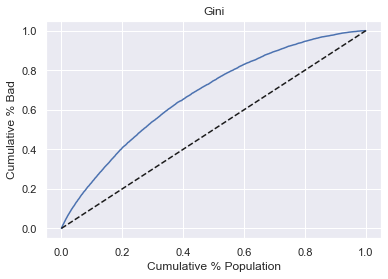

In [64]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],
         df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Bad'],
         df_actual_predicted_probs['Cumulative Perc Bad'],
        linestyle = '--', color ='k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

Gini coefficient numerically captures how far the model curve diverges from the random line, with a larger area indicating better model performance.

How It Relates to the Plot:

A steep, sharply rising curve on the Gini plot that diverges significantly from the diagonal will correspond to a high Gini coefficient, showing strong predictive power.

A more gradual curve that runs close to the diagonal line suggests a lower Gini coefficient, indicating that the model doesn’t significantly improve upon random chance.

In [65]:
Gini = AUROC * 2 - 1
Gini

0.39465287264779114

the Gini score of 0.3946 suggests that the model has some discriminatory power but can likely be improved.

Benchmark Gini:
1. Minimum typically 40% however for newly developed models, this is too low. 
2. Good model might have Gini above 60%.

# Kolmogorov-Smirnov

The Kolmogorov-Smirnov (KS) statistic is a measure used in credit risk modeling to evaluate a model’s discriminatory power. Specifically, it quantifies the maximum separation between two cumulative distribution functions—typically the cumulative distributions of predicted probabilities for “good” (non-default) and “bad” (default) cases.

What Does the KS Statistic Represent?

The KS statistic is the maximum difference between the cumulative percentage of “bad” cases and the cumulative percentage of “good” cases at any point in the distribution.

This maximum difference indicates the model's ability to distinguish between the two groups.

The higher the KS value, the better the model is at separating good and bad cases. 

Generally, a KS value above 0.4 is considered strong, between 0.2 and 0.4 is moderate, and below 0.2 is weak.

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

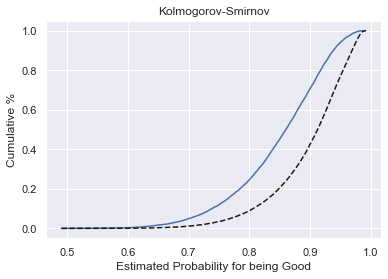

In [66]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],
         df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],
         df_actual_predicted_probs['Cumulative Perc Good'],
        linestyle = '--', color ='k')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

A solid line showing the cumulative percentage of “bad” cases as the estimated probability increases.

A dashed line representing the cumulative percentage of “good” cases.

In [67]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.2868590857060068

The KS statistic (0.2869 or 28.69%) here is calculated as the maximum vertical distance between these two lines. This value represents the model's discriminatory power:

Since the KS value is around 0.29, this model has moderate discriminatory power in distinguishing between good and bad cases.
The point where the two lines have the maximum vertical separation indicates the threshold probability where the model is most effective in distinguishing between default and non-default cases.

# PD Model and Scorecard

In [68]:
summary_table

,Feature name,Coefficients,P Values
0,Intercept,1.183041,NaN
1,grade:A,0.753972,1.842806e-15
2,grade:B,0.701976,1.054752e-29
3,grade:C,0.511710,7.146954e-19
4,grade:D,0.365459,2.777032e-11
...,...,...,...
65,dti:10.5-16.1,0.307883,2.498624e-07
66,dti:16.1-20.3,0.218219,2.600277e-04
67,dti:20.3-21.7,0.192728,1.997301e-03
68,dti:21.7-22.4,0.129540,5.039008e-02


In [69]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'inq_last_6mths:>6',
 'total_acc:<=27',
 'dti:>35']

In [70]:
#Creating a DataFrame for Reference Categories (df_ref_cat)
df_ref_cat = pd.DataFrame(columns = ['Feature name'], data = ref_categories)
df_ref_cat['Coefficients'] = 0
df_ref_cat['P Values'] = np.nan

# Concat the ref cats with summary_table
df_scorecard = pd.concat([summary_table, df_ref_cat])
df_scorecard = df_scorecard.reset_index()
df_scorecard.drop(['index'], axis= 1, inplace = True)

# Extract original feature name
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,Feature name,Coefficients,P Values,Original feature name
0,Intercept,1.183041,NaN,Intercept
1,grade:A,0.753972,1.842806e-15,grade
2,grade:B,0.701976,1.054752e-29,grade
3,grade:C,0.511710,7.146954e-19,grade
4,grade:D,0.365459,2.777032e-11,grade
...,...,...,...,...
78,mths_since_issue_d:>84,0.000000,NaN,mths_since_issue_d
79,int_rate:>20.281,0.000000,NaN,int_rate
80,inq_last_6mths:>6,0.000000,NaN,inq_last_6mths
81,total_acc:<=27,0.000000,NaN,total_acc


In [71]:
#Groups the data by 'Original feature name' and computes the minimum and maximum coefficients within each group.

df_scorecard_group_min = df_scorecard.groupby('Original feature name')['Coefficients'].min()
df_scorecard_group_max = df_scorecard.groupby('Original feature name')['Coefficients'].max()

In [72]:
pd.set_option('display.max_rows', None)
df_scorecard_group_min

Original feature name
Intercept                      1.183041
addr_state                     0.000000
annual_inc                     0.137440
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                -1.439681
int_rate                       0.000000
mths_since_earliest_cr_line   -0.036516
mths_since_issue_d            -0.349463
open_acc                       0.052705
purpose                        0.000000
term                           0.000000
total_acc                     -0.021388
verification_status            0.000000
Name: Coefficients, dtype: float64

In [73]:
#Summing the Minimum Coefficients
min_sum_coef = df_scorecard_group_min.sum()
min_sum_coef

-0.47386076114530706

In [74]:
#Summing the Maximum Coefficients
max_sum_coef = df_scorecard_group_max.sum()
max_sum_coef

6.344718358572715

In [75]:
min_score = 300
max_score = 850

Score Calculation (Normalization)

Score = (Coefficient) * (Max Score - Min Score / Max Sum Coefficients - Min Sum Coefficients)

In [76]:
df_scorecard['Score - Calculation'] = \
df_scorecard['Coefficients']*(max_score - min_score)/(max_sum_coef - min_sum_coef)
pd.set_option('display.max_rows', 10)
df_scorecard

,Feature name,Coefficients,P Values,Original feature name,Score - Calculation
0,Intercept,1.183041,NaN,Intercept,95.426418
1,grade:A,0.753972,1.842806e-15,grade,60.816866
2,grade:B,0.701976,1.054752e-29,grade,56.622787
3,grade:C,0.511710,7.146954e-19,grade,41.275566
4,grade:D,0.365459,2.777032e-11,grade,29.478631
...,...,...,...,...,...
78,mths_since_issue_d:>84,0.000000,NaN,mths_since_issue_d,0.000000
79,int_rate:>20.281,0.000000,NaN,int_rate,0.000000
80,inq_last_6mths:>6,0.000000,NaN,inq_last_6mths,0.000000
81,total_acc:<=27,0.000000,NaN,total_acc,0.000000


Calculating the Intercept for the First Feature

Intercept Score formula

intercept_score = ((max_score - min_score) / (max_sum_coef - min_sum_coef)) * (first_feature_coef - min_sum_coef) + min_score


In [77]:
#Calculate the intercept
df_scorecard['Score - Calculation'][0] = \
(max_score - min_score)/(max_sum_coef - min_sum_coef) * \
(df_scorecard['Coefficients'][0] - min_sum_coef) + min_score
df_scorecard

C:\Users\prem kumarr r s\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Feature name,Coefficients,P Values,Original feature name,Score - Calculation
0,Intercept,1.183041,NaN,Intercept,433.648959
1,grade:A,0.753972,1.842806e-15,grade,60.816866
2,grade:B,0.701976,1.054752e-29,grade,56.622787
3,grade:C,0.511710,7.146954e-19,grade,41.275566
4,grade:D,0.365459,2.777032e-11,grade,29.478631
...,...,...,...,...,...
78,mths_since_issue_d:>84,0.000000,NaN,mths_since_issue_d,0.000000
79,int_rate:>20.281,0.000000,NaN,int_rate,0.000000
80,inq_last_6mths:>6,0.000000,NaN,inq_last_6mths,0.000000
81,total_acc:<=27,0.000000,NaN,total_acc,0.000000


In [78]:
# Round the scores
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,Feature name,Coefficients,P Values,Original feature name,Score - Calculation,Score - Preliminary
0,Intercept,1.183041,NaN,Intercept,433.648959,434.0
1,grade:A,0.753972,1.842806e-15,grade,60.816866,61.0
2,grade:B,0.701976,1.054752e-29,grade,56.622787,57.0
3,grade:C,0.511710,7.146954e-19,grade,41.275566,41.0
4,grade:D,0.365459,2.777032e-11,grade,29.478631,29.0
...,...,...,...,...,...,...
78,mths_since_issue_d:>84,0.000000,NaN,mths_since_issue_d,0.000000,0.0
79,int_rate:>20.281,0.000000,NaN,int_rate,0.000000,0.0
80,inq_last_6mths:>6,0.000000,NaN,inq_last_6mths,0.000000,0.0
81,total_acc:<=27,0.000000,NaN,total_acc,0.000000,0.0


In [79]:
# Check if the sum of the scores would be correct
min_sum_score_prel = \
df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [80]:
max_sum_score_prel = \
df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel
# Have to subtract the 1 extra point

851.0

In [81]:
df_scorecard['Difference'] = \
df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
pd.options.display.max_rows = 30
df_scorecard

,Feature name,Coefficients,P Values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,Intercept,1.183041,NaN,Intercept,433.648959,434.0,0.351041
1,grade:A,0.753972,1.842806e-15,grade,60.816866,61.0,0.183134
2,grade:B,0.701976,1.054752e-29,grade,56.622787,57.0,0.377213
3,grade:C,0.511710,7.146954e-19,grade,41.275566,41.0,-0.275566
4,grade:D,0.365459,2.777032e-11,grade,29.478631,29.0,-0.478631
...,...,...,...,...,...,...,...
78,mths_since_issue_d:>84,0.000000,NaN,mths_since_issue_d,0.000000,0.0,0.000000
79,int_rate:>20.281,0.000000,NaN,int_rate,0.000000,0.0,0.000000
80,inq_last_6mths:>6,0.000000,NaN,inq_last_6mths,0.000000,0.0,0.000000
81,total_acc:<=27,0.000000,NaN,total_acc,0.000000,0.0,0.000000


This code calculates the maximum difference between the preliminary score and calculated score for each parent category (based on 'Original feature name').

By checking the maximum score for each feature category, it ensures that only the rows with the highest score for a particular feature contribute their difference to the max_difference list.

The list max_difference will therefore hold the differences for the rows that have the highest 'Score - Preliminary' for their respective categories, and 0 for all others.

In [82]:
# Find the max score among each parent category

ind = list(df_scorecard.index) #Create an index list
max_difference = [] #Create an empty set to store max difference for each cat
for i in ind:
    ori_name = df_scorecard['Original feature name'][i]
    this_score = df_scorecard['Score - Preliminary'][i]
    max_score_t = df_scorecard.loc[df_scorecard['Original feature name']
                               == ori_name]['Score - Preliminary'].max()
    this_diff = df_scorecard['Difference'][i]
    
    if this_score == max_score_t:
        max_difference.append(this_diff)
    else:
        max_difference.append(0)

In [83]:
# Assign the calculated max differences to the new 'Max_Difference' column
df_scorecard['Max_Difference'] = max_difference

# Set the 'Max_Difference' for the first row to 0 explicitly
df_scorecard['Max_Difference'][0] = 0

pd.options.display.max_rows = None
df_scorecard

C:\Users\prem kumarr r s\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Feature name,Coefficients,P Values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Max_Difference
0,Intercept,1.183041,NaN,Intercept,433.648959,434.0,0.351041,0.000000
1,grade:A,0.753972,1.842806e-15,grade,60.816866,61.0,0.183134,0.183134
2,grade:B,0.701976,1.054752e-29,grade,56.622787,57.0,0.377213,0.000000
3,grade:C,0.511710,7.146954e-19,grade,41.275566,41.0,-0.275566,0.000000
4,grade:D,0.365459,2.777032e-11,grade,29.478631,29.0,-0.478631,0.000000
5,grade:E,0.250431,2.992781e-07,grade,20.200270,20.0,-0.200270,0.000000
6,grade:F,0.108543,3.326276e-02,grade,8.755302,9.0,0.244698,0.000000
7,home_ownership:OWN,0.083602,3.402758e-05,home_ownership,6.743486,7.0,0.256514,0.000000
8,home_ownership:MORTGAGE,0.107817,1.356195e-17,home_ownership,8.696746,9.0,0.303254,0.303254
9,addr_state:OK_TN_MO_LA_MD_NC,0.038153,5.875137e-02,addr_state,3.077479,3.0,-0.077479,0.000000


Identifying the row with the largest maximum difference and then adjust its final score slightly (by subtracting 1). done to fine-tune or correct for scoring inconsistencies, ensuring that the scorecard behaves as expected.

In [84]:
# Get the index of the row with the highest max difference
max_diff_ind = df_scorecard['Max_Difference'].idxmax()
# Copy the preliminary scores to create a new 'Score - Final' column
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
# Subtract 1 from the 'Score - Final' for the row with the highest max difference
df_scorecard['Score - Final'][max_diff_ind] = df_scorecard['Score - Final'][max_diff_ind] - 1

C:\Users\prem kumarr r s\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [85]:
max_sum_score_prel = \
df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

850.0

In [86]:
min_sum_score_prel = \
df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

300.0

# Calculating credit scores

In [87]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [88]:
pd.options.display.max_rows = 10

In [89]:
# Add a 'intercept' column
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
inputs_test_with_ref_cat_w_intercept

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35
115315,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
420540,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
76957,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
114743,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
365207,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312682,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
165513,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
242391,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
166140,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [90]:
# Make the column order match the row order of the scorecard df
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
inputs_test_with_ref_cat_w_intercept

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:OK_TN_MO_LA_MD_NC,...,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,inq_last_6mths:>6,total_acc:<=27,dti:>35
115315,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
420540,1,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
76957,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
114743,1,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
365207,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312682,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
165513,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
242391,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
166140,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [91]:
scorecard_scores = df_scorecard['Score - Preliminary']
scorecard_scores.shape

(83,)

In [92]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 83)

In [93]:
# Reshape the scorecard_scores
scorecard_scores = scorecard_scores.values.reshape(scorecard_scores.shape[0],1)
scorecard_scores.shape

(83, 1)

In [94]:
#Calculate credit scores all accounts
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores

,0
115315,561.0
420540,591.0
76957,556.0
114743,476.0
365207,644.0
...,...
312682,597.0
165513,549.0
242391,502.0
166140,496.0


# Credit Score to PD

In [95]:
#Convert PD to sum of the coeffs
#convert credit scores back to the sum of coefficients that contributed to those scores. 
#This allows for a reverse mapping from the scaled credit score to the underlying sum of the feature coefficients that produced it.
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
sum_coef_from_score

,0
115315,2.761865
420540,3.133787
76957,2.699878
114743,1.708085
365207,3.790851
...,...
312682,3.208172
165513,2.613096
242391,2.030417
166140,1.956033


the predicted probability (often representing the probability of an event such as default in a credit risk model) from the sum of coefficients (sum_coef_from_score). This approach transforms the score into a probability using the logistic function, which is commonly applied in credit scoring and classification models.

In [96]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
115315,0.940580
420540,0.958265
76957,0.937019
114743,0.846588
365207,0.977922


# Setting Cut-offs

In [97]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1,0)
df_actual_predicted_probs

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,226840,0,0.490543,0,1,0,1,0.000011,0.000000,0.000099
1,19479,0,0.509014,0,2,0,2,0.000021,0.000000,0.000197
2,2808,0,0.509383,0,3,0,3,0.000032,0.000000,0.000296
3,207474,1,0.514504,0,4,1,3,0.000043,0.000012,0.000296
4,230404,0,0.526574,0,5,1,4,0.000054,0.000012,0.000394
...,...,...,...,...,...,...,...,...,...,...
93252,259404,1,0.991157,1,93253,83108,10145,0.999957,0.999952,1.000000
93253,256391,1,0.991207,1,93254,83109,10145,0.999968,0.999964,1.000000
93254,263771,1,0.991284,1,93255,83110,10145,0.999979,0.999976,1.000000
93255,311853,1,0.991443,1,93256,83111,10145,0.999989,0.999988,1.000000


In [98]:
#we need the confusion matrix again
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs.y_hat_test_proba>=tr,1,0)

#creating a confusion matrix
print(pd.crosstab(df_actual_predicted_probs.loan_data_targets_test, df_actual_predicted_probs.y_hat_test, rownames = ['Actual'], colnames = ['Predicted']))
#checking accuracy
print('Accuracy : ',metrics.accuracy_score(df_actual_predicted_probs.loan_data_targets_test, df_actual_predicted_probs.y_hat_test))

Predicted      0      1
Actual                 
0           7177   2968
1          35409  47703
Accuracy :  0.5884812936294327


In [99]:
#checking roc curves
fpr, tpr, thresholds = metrics.roc_curve(df_actual_predicted_probs.loan_data_targets_test, df_actual_predicted_probs.y_hat_test_proba)

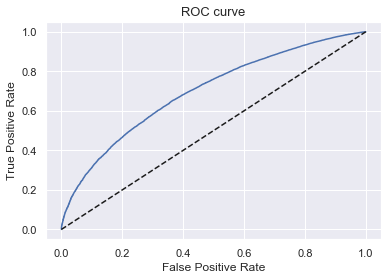

In [100]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr, '--k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve',size = 13)
plt.show()

In [101]:
#checking area under the roc curvre
roc_auc = metrics.roc_auc_score(df_actual_predicted_probs.loan_data_targets_test, df_actual_predicted_probs.y_hat_test_proba)
roc_auc

0.6973264363238956

In [102]:
thresholds.shape

(17750,)

In [103]:
#concatenate fpr, tpr and thresholds in a single dataframe
df_cutoffs = pd.DataFrame(data = thresholds, columns = ['Thresholds'])
df_cutoffs.shape

(17750, 1)

In [104]:
df_cutoffs['FPR'] = fpr
df_cutoffs['TPR'] = tpr
df_cutoffs.head()

,Thresholds,FPR,TPR
0,1.991488,0.0,0.000000
1,0.991488,0.0,0.000012
2,0.990010,0.0,0.000313
3,0.989954,0.0,0.000337
4,0.989783,0.0,0.000373


Setting this value close to 1 ensures that the model's scoring range is broad enough to cover high scores effectively without reaching exactly 1, which can sometimes cause issues in logistic transformations.

In [105]:
df_cutoffs['Thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

calculating credit scores for each threshold value in df_cutoffs, converting logistic probabilities (thresholds) to a familiar scoring range (e.g., 300–850) by reversing the logistic transformation and aligning scores with the model’s defined range.

In [106]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['Thresholds'] / (1 - df_cutoffs['Thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [107]:
df_cutoffs.head()

,Thresholds,FPR,TPR,Score
0,1.000000,0.0,0.000000,2061.0
1,0.991488,0.0,0.000012,722.0
2,0.990010,0.0,0.000313,709.0
3,0.989954,0.0,0.000337,709.0
4,0.989783,0.0,0.000373,707.0


In [108]:
#setting the first score as max score
df_cutoffs['Score'][0] = max_score
df_cutoffs.head()

,Thresholds,FPR,TPR,Score
0,1.000000,0.0,0.000000,850.0
1,0.991488,0.0,0.000012,722.0
2,0.990010,0.0,0.000313,709.0
3,0.989954,0.0,0.000337,709.0
4,0.989783,0.0,0.000373,707.0


This function returns the number of rows with a predicted probability greater than or equal to p, which could represent the count of approved applications or accepted predictions in a credit approval or classification scenario.

By adjusting p, you can quickly see how many predictions meet various probability thresholds, making it useful for analyzing approval rates at different cutoff levels in a credit scoring or risk assessment model.

In [109]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

This code provides a comprehensive view of how the number of approved and rejected applications and their corresponding rates change at different probability thresholds. This allows for:

Threshold Analysis: By adjusting the probability threshold, one can see how many applications would be approved or rejected.

Decision-Making Insights: This is particularly useful in credit risk and lending, where the approval/rejection criteria can be fine-tuned based on the desired risk tolerance or business strategy.

In [110]:
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Approved'] = df_cutoffs['Thresholds'].apply(n_approved)

# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']

# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]

# Rejection rate equals one minus approval rate.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [111]:
df_cutoffs

,Thresholds,FPR,TPR,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.991488,0.000000,0.000012,722.0,1,93256,0.000011,0.999989
2,0.990010,0.000000,0.000313,709.0,26,93231,0.000279,0.999721
3,0.989954,0.000000,0.000337,709.0,28,93229,0.000300,0.999700
4,0.989783,0.000000,0.000373,707.0,31,93226,0.000332,0.999668
...,...,...,...,...,...,...,...,...
17745,0.539874,0.999507,0.999976,351.0,93250,7,0.999925,0.000075
17746,0.536378,0.999507,0.999988,350.0,93251,6,0.999936,0.000064
17747,0.526574,0.999704,0.999988,347.0,93253,4,0.999957,0.000043
17748,0.514504,0.999704,1.000000,343.0,93254,3,0.999968,0.000032


top 5 rows reflect a conservative, risk-averse strategy, approving only a few highly creditworthy applications while rejecting nearly all, resulting in high credit scores and low TPR and FPR values.

Bottom 5 rows reflect a lenient strategy, approving nearly all applications, with a high approval rate, low credit scores, and high FPR and TPR, indicating a higher risk tolerance.

In [112]:
df_cutoffs.iloc[1000: 2000, ]

,Thresholds,FPR,TPR,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.954194,0.046723,0.199105,583.0,17022,76235,0.182528,0.817472
1001,0.954192,0.046821,0.199105,583.0,17023,76234,0.182539,0.817461
1002,0.954160,0.046821,0.199345,583.0,17043,76214,0.182753,0.817247
1003,0.954159,0.047018,0.199345,583.0,17045,76212,0.182774,0.817226
1004,0.954128,0.047018,0.199574,583.0,17064,76193,0.182978,0.817022
...,...,...,...,...,...,...,...,...
1995,0.938960,0.096698,0.306671,559.0,26469,66788,0.283829,0.716171
1996,0.938956,0.096895,0.306671,559.0,26471,66786,0.283850,0.716150
1997,0.938896,0.096895,0.307116,559.0,26508,66749,0.284247,0.715753
1998,0.938891,0.096994,0.307116,559.0,26509,66748,0.284257,0.715743


If the cutoff score is 583, only about 18% of the applications will be accepted for credit.

In [113]:
df_scorecard.to_csv('df_scorecard.csv')

In [114]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')